## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 
#### Example 1: Identify drugs that has been approved or in-clinical-trial or in-test-for ovarian cancer


In [1]:
from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np


### Load Translator resources


In [3]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info



In [4]:
APInames, metaKG, Translator_KP_info= load_translator_resources()

In [5]:
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

## Find the neiborhood of an entity from a subset of APIs 


In [31]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist =['Clinical Trials KP - TRAPI 1.5.0',
                   ]

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
print(select_APIs)
print(selected_metaKG.shape)


{'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/ctkp/query'}
(29, 5)


In [32]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('AML',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = select_APIs,
                                                                                            metaKG = selected_metaKG,
                                                                                            API_predicates = API_predicates)     

MONDO:0018874
Clinical Trials KP - TRAPI 1.5.0: Success!
NodeNorm does not know about these identifiers: DRUGBANK:DB19304,UMLS:C5907983,UMLS:C5908001,DRUGBANK:DB19070,GTOPDB:13607,UMLS:C5907931,DRUGBANK:DB18753,UMLS:C5908989,CHEMBL.COMPOUND:CHEMBL5483015,UMLS:C5888788,UMLS:C5907992,CHEBI:232584,DRUGBANK:DB18980,DRUGBANK:DB18872,CHEBI:232616,CHEBI:232328


NodeNorm does not know about these identifiers: UMLS:C5888788,UMLS:C5908989,CHEMBL.COMPOUND:CHEMBL5483015,CHEBI:232616,CHEBI:232328,DRUGBANK:DB18980,DRUGBANK:DB18872,CHEBI:232584,UMLS:C5907992,DRUGBANK:DB19304,GTOPDB:13607,DRUGBANK:DB18753,UMLS:C5907931,UMLS:C5907983,DRUGBANK:DB19070,UMLS:C5908001
[Text(0.5, 0, 'Minnelide'), Text(2.5, 0, 'Evorpacept'), Text(4.5, 0, 'INTERFERON GAMMA-1B'), Text(6.5, 0, 'Tigecycline'), Text(8.5, 0, 'purine-6-thiol'), Text(10.5, 0, '[(2R,5R)-3,4-Dihydroxy-5-(6-oxo-1H-purin-9-yl)oxolan-2-yl]methyl dihydrogen phosphate'), Text(12.5, 0, 'Cusatuzumab'), Text(14.5, 0, 'Aprepitant'), Text(16.5, 0, 'Tetanus Toxoid'), Text(18.5, 0, 'SABATOLIMAB'), Text(20.5, 0, 'KPT-9274'), Text(22.5, 0, 'CFI-400945'), Text(24.5, 0, 'PIVEKIMAB SUNIRINE'), Text(26.5, 0, 'Troxacitabine'), Text(28.5, 0, 'Cytarabine'), Text(30.5, 0, 'LPS with O-antigen'), Text(32.5, 0, 'Cyclosporine A'), Text(34.5, 0, 'Onvansertib'), Text(36.5, 0, '1H-indole, 2-(2-((3,5-dimethyl-1H-pyrrol-2-yl)methyl

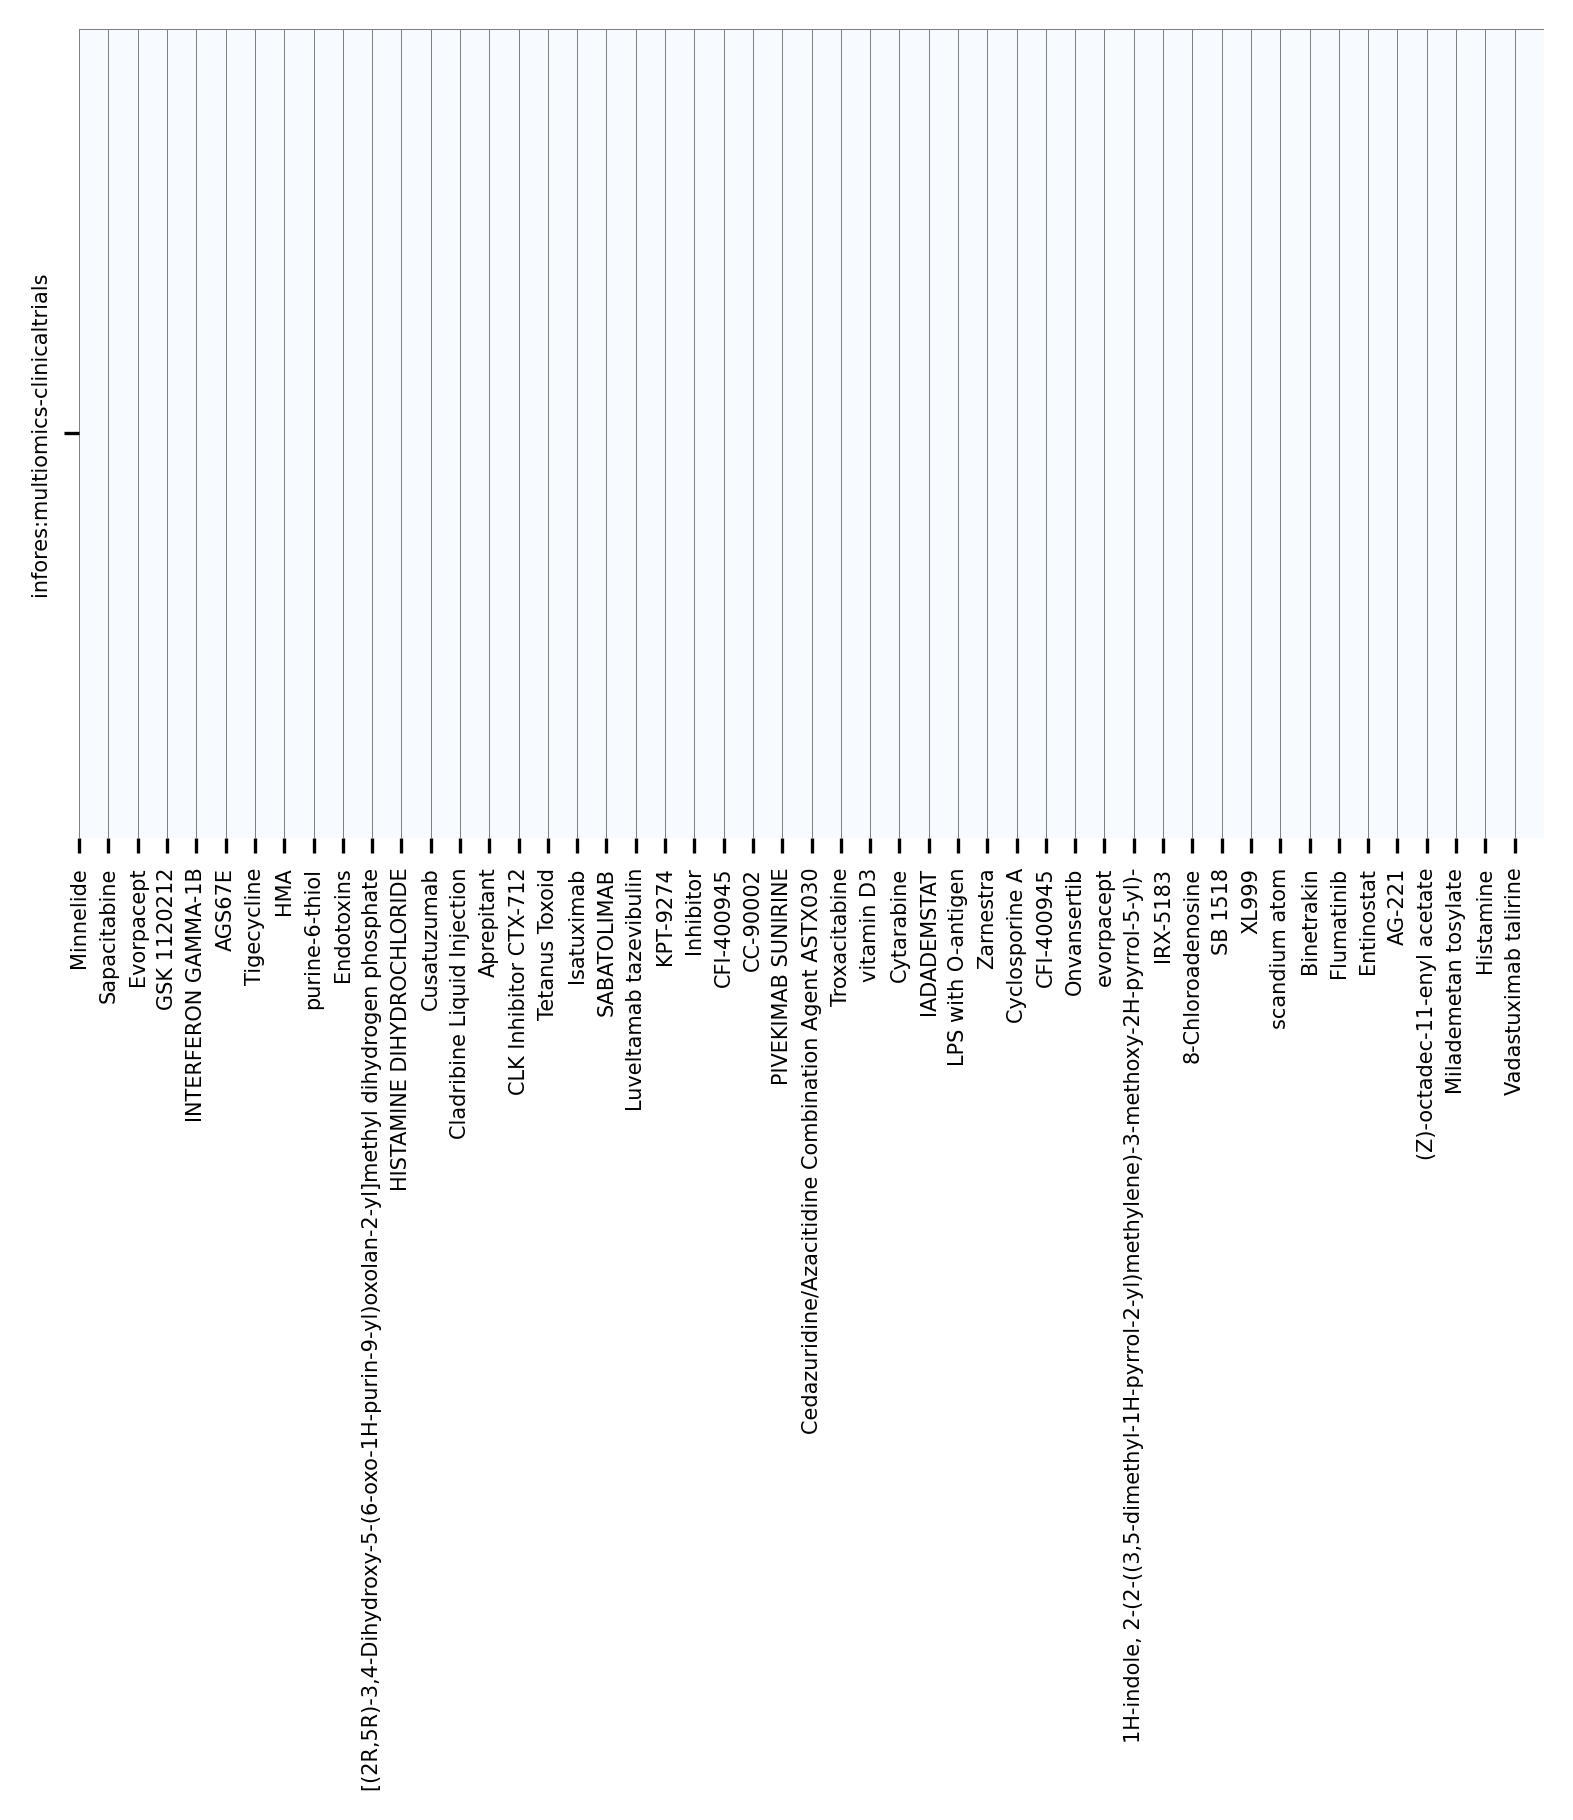

[Text(0.5, 0, 'Minnelide'), Text(2.5, 0, 'Evorpacept'), Text(4.5, 0, 'INTERFERON GAMMA-1B'), Text(6.5, 0, 'Tigecycline'), Text(8.5, 0, 'purine-6-thiol'), Text(10.5, 0, '[(2R,5R)-3,4-Dihydroxy-5-(6-oxo-1H-purin-9-yl)oxolan-2-yl]methyl dihydrogen phosphate'), Text(12.5, 0, 'Cusatuzumab'), Text(14.5, 0, 'Aprepitant'), Text(16.5, 0, 'Tetanus Toxoid'), Text(18.5, 0, 'SABATOLIMAB'), Text(20.5, 0, 'KPT-9274'), Text(22.5, 0, 'CFI-400945'), Text(24.5, 0, 'PIVEKIMAB SUNIRINE'), Text(26.5, 0, 'Troxacitabine'), Text(28.5, 0, 'Cytarabine'), Text(30.5, 0, 'LPS with O-antigen'), Text(32.5, 0, 'Cyclosporine A'), Text(34.5, 0, 'Onvansertib'), Text(36.5, 0, '1H-indole, 2-(2-((3,5-dimethyl-1H-pyrrol-2-yl)methylene)-3-methoxy-2H-pyrrol-5-yl)-'), Text(38.5, 0, '8-Chloroadenosine'), Text(40.5, 0, 'XL999'), Text(42.5, 0, 'Binetrakin'), Text(44.5, 0, 'Entinostat'), Text(46.5, 0, '(Z)-octadec-11-enyl acetate'), Text(48.5, 0, 'Histamine')]


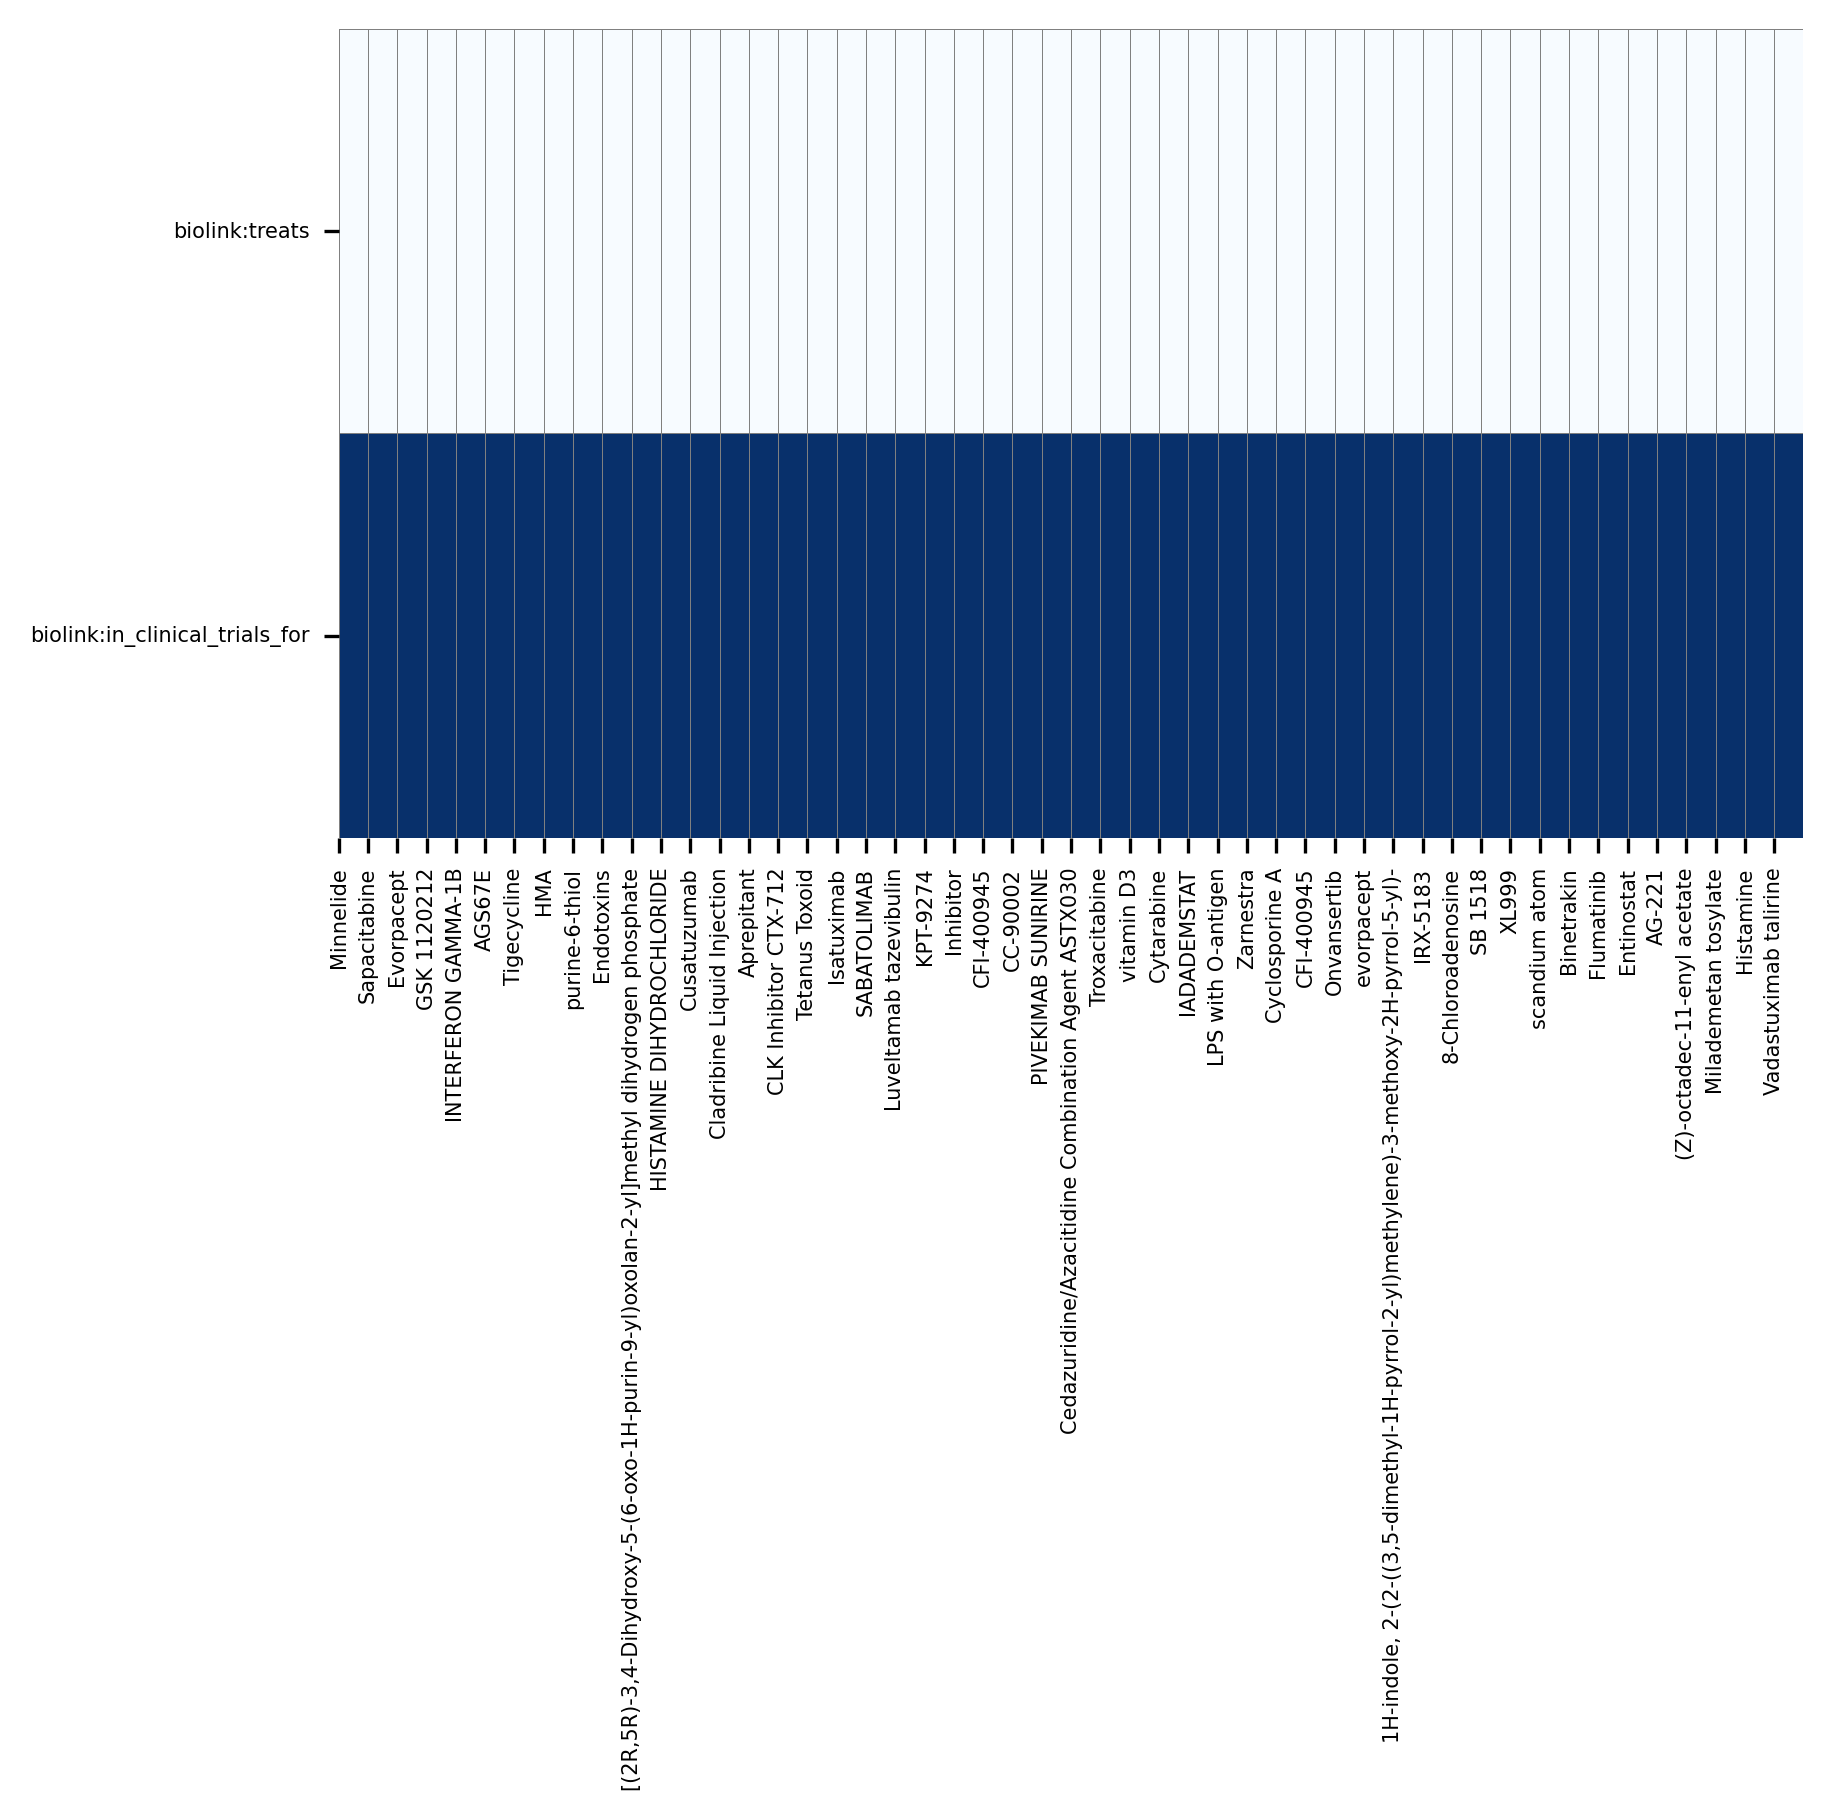

Minnelide  Sapacitabine  Evorpacept  \
biolink:treats                          0             0           0   
biolink:in_clinical_trials_for          1             1           1   

                                GSK 1120212  INTERFERON GAMMA-1B  AGS67E  \
biolink:treats                            0                    0       0   
biolink:in_clinical_trials_for            1                    1       1   

                                Tigecycline  HMA  purine-6-thiol  Endotoxins  \
biolink:treats                            0    0               0           0   
biolink:in_clinical_trials_for            1    1               1           1   

                                ...  DILANUBICEL  Ponatinib  EPZ-5676  \
biolink:treats                  ...            0          0         0   
biolink:in_clinical_trials_for  ...            1          1         1   

                                Amifostine  L-ascorbate  hydrogen donor  \
biolink:treats                           0            0               0   
biolink:in_clinical_trials_for           1            1               1   

                                E7820  DS 3201b  Eltanexor  Lomustine  
biolink:treats                      0         0          0          0  
biolink:in_clinical_trials_for      1         1          1          1  

[2 rows x 931 columns]

In [33]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

MONDO:0018874
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Automat-reactome(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hmdb(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
CATRAX Pharmacogenomics KP - TRAPI 1.

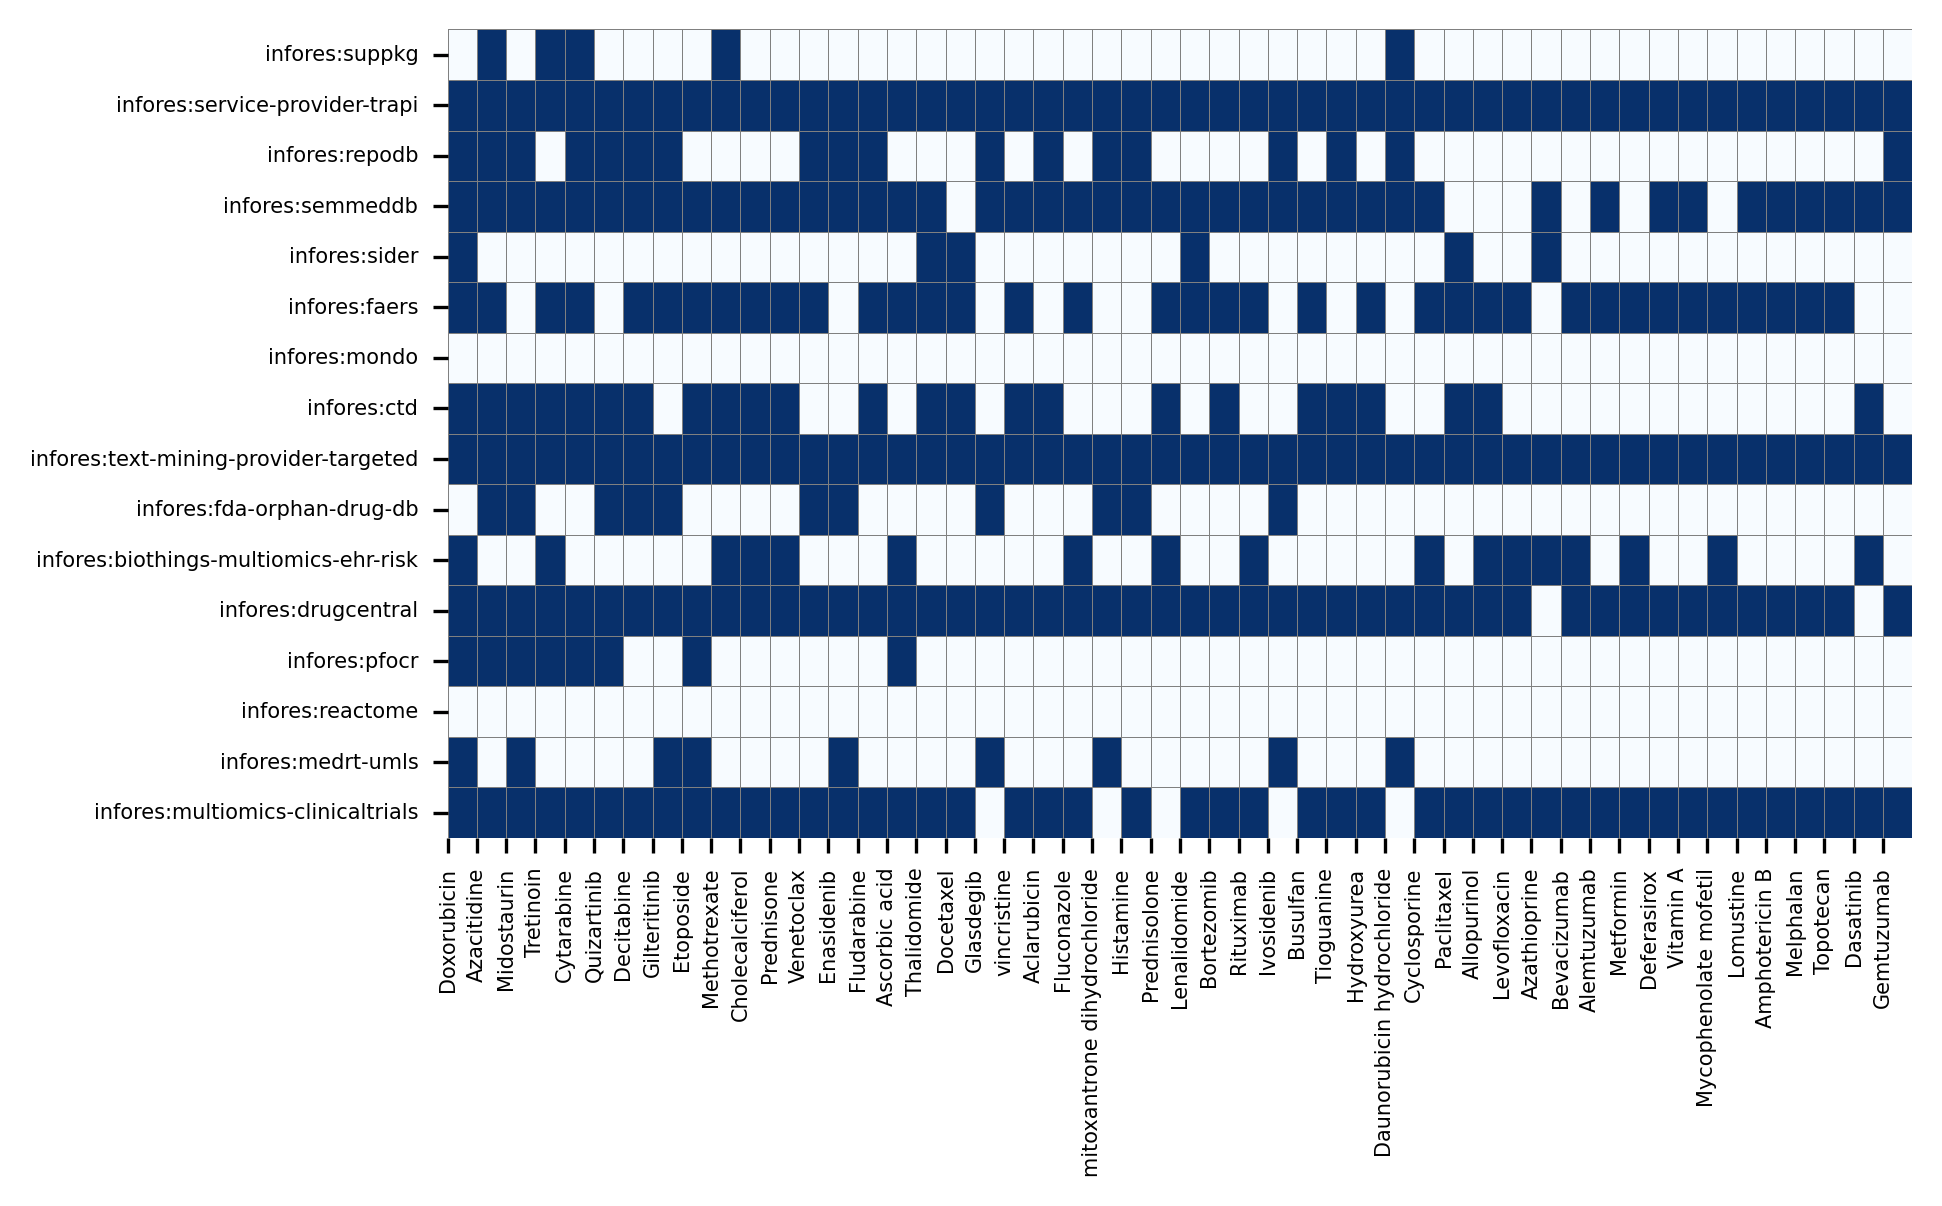

[Text(0.5, 0, 'Doxorubicin'), Text(2.5, 0, 'Midostaurin'), Text(4.5, 0, 'Cytarabine'), Text(6.5, 0, 'Decitabine'), Text(8.5, 0, 'Etoposide'), Text(10.5, 0, 'Cholecalciferol'), Text(12.5, 0, 'Venetoclax'), Text(14.5, 0, 'Fludarabine'), Text(16.5, 0, 'Thalidomide'), Text(18.5, 0, 'Glasdegib'), Text(20.5, 0, 'Aclarubicin'), Text(22.5, 0, 'mitoxantrone dihydrochloride'), Text(24.5, 0, 'Prednisolone'), Text(26.5, 0, 'Bortezomib'), Text(28.5, 0, 'Ivosidenib'), Text(30.5, 0, 'Tioguanine'), Text(32.5, 0, 'Daunorubicin hydrochloride'), Text(34.5, 0, 'Paclitaxel'), Text(36.5, 0, 'Levofloxacin'), Text(38.5, 0, 'Bevacizumab'), Text(40.5, 0, 'Metformin'), Text(42.5, 0, 'Vitamin A'), Text(44.5, 0, 'Lomustine'), Text(46.5, 0, 'Melphalan'), Text(48.5, 0, 'Dasatinib')]


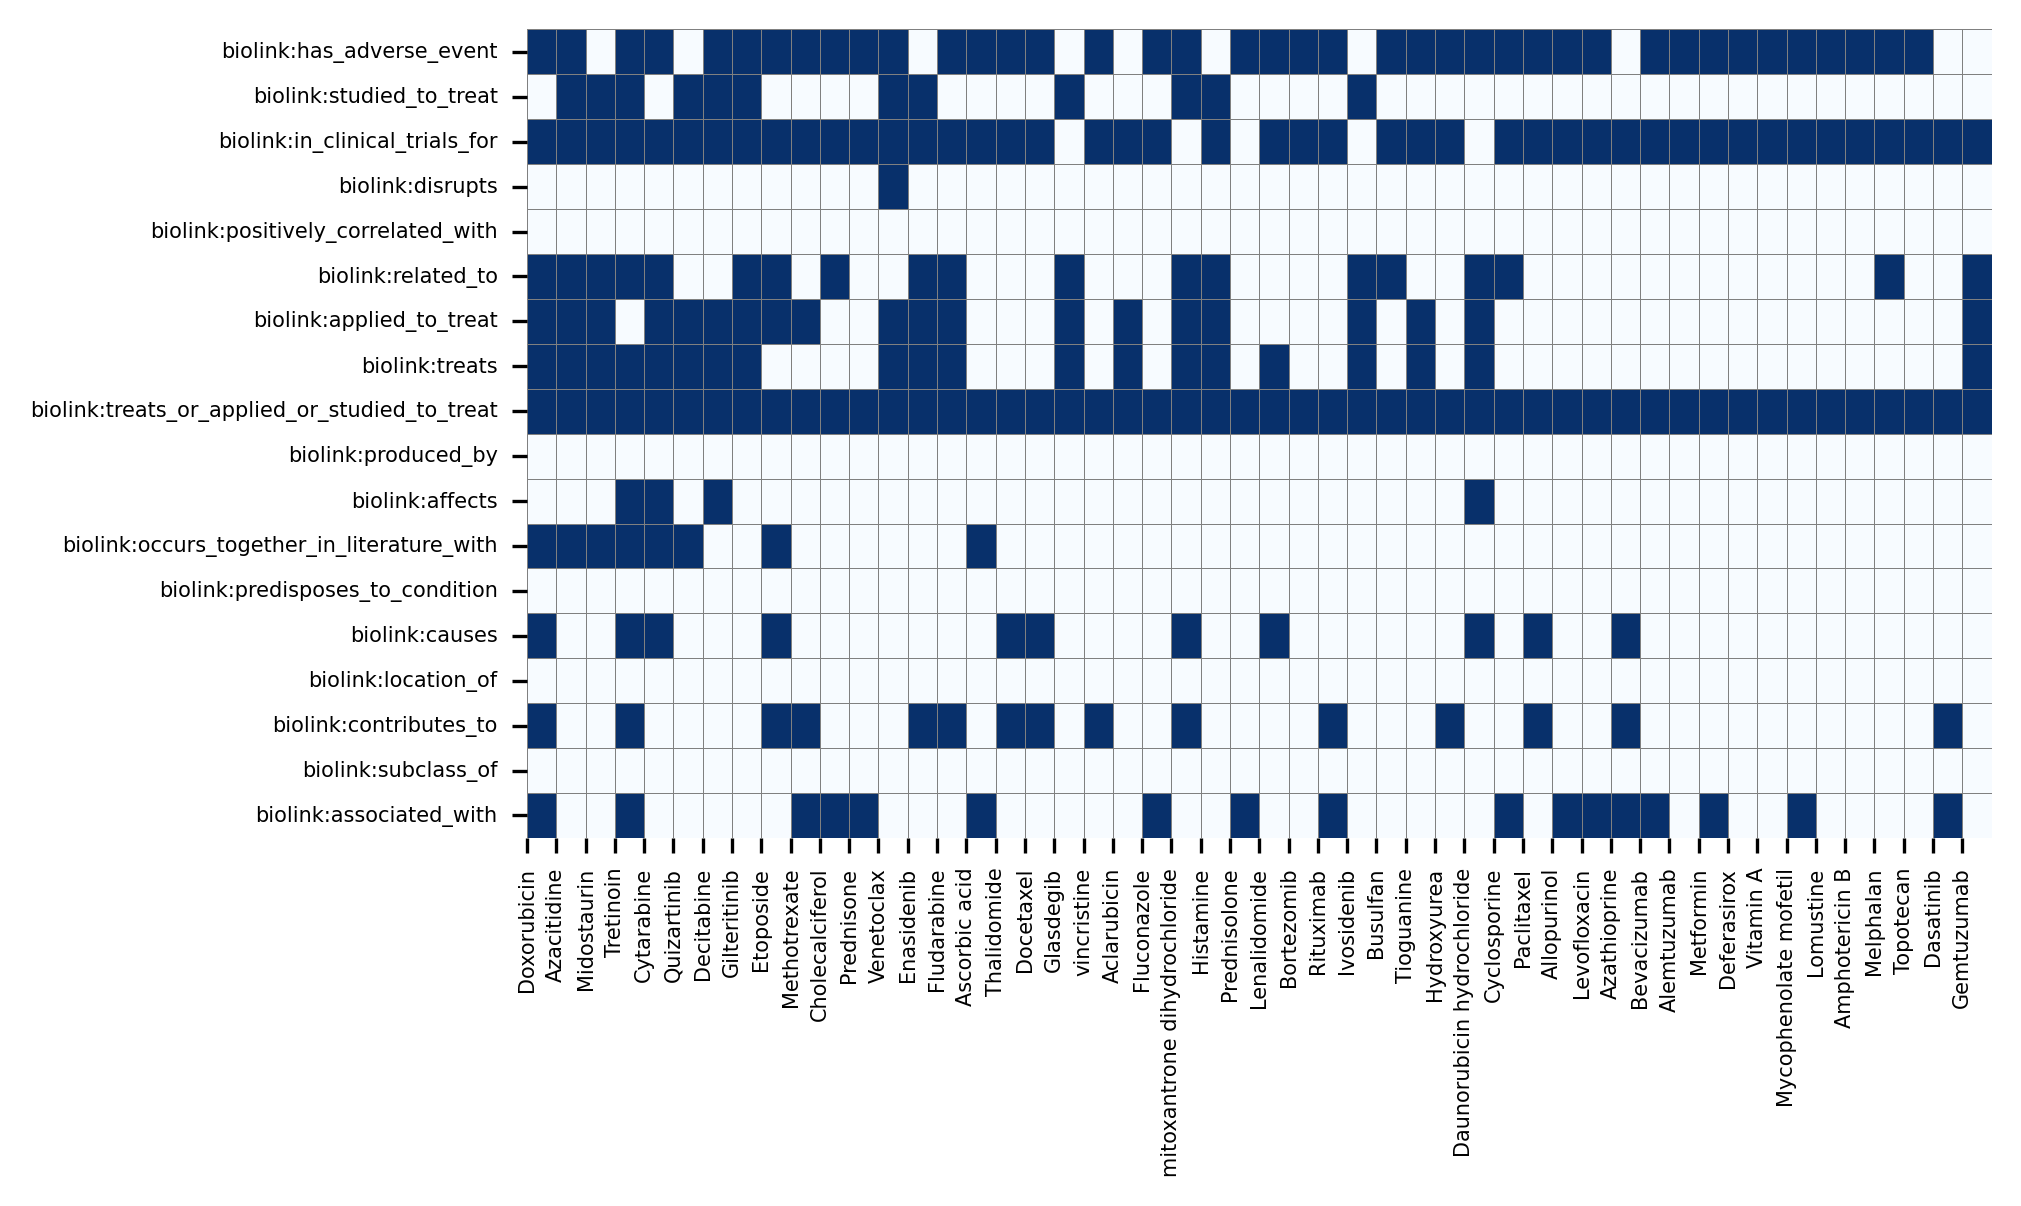

Doxorubicin  Azacitidine  \
biolink:has_adverse_event                                1            1   
biolink:studied_to_treat                                 0            1   
biolink:in_clinical_trials_for                           1            1   
biolink:disrupts                                         0            0   
biolink:positively_correlated_with                       0            0   
biolink:related_to                                       1            1   
biolink:applied_to_treat                                 1            1   
biolink:treats                                           1            1   
biolink:treats_or_applied_or_studied_to_treat            1            1   
biolink:produced_by                                      0            0   
biolink:affects                                          0            0   
biolink:occurs_together_in_literature_with               1            1   
biolink:predisposes_to_condition                         0            0   
biolink:causes                                           1            0   
biolink:location_of                                      0            0   
biolink:contributes_to                                   1            0   
biolink:subclass_of                                      0            0   
biolink:associated_with                                  1            0   

                                               Midostaurin  Tretinoin  \
biolink:has_adverse_event                                0          1   
biolink:studied_to_treat                                 1          1   
biolink:in_clinical_trials_for                           1          1   
biolink:disrupts                                         0          0   
biolink:positively_correlated_with                       0          0   
biolink:related_to                                       1          1   
biolink:applied_to_treat                                 1          0   
biolink:treats                                           1          1   
biolink:treats_or_applied_or_studied_to_treat            1          1   
biolink:produced_by                                      0          0   
biolink:affects                                          0          1   
biolink:occurs_together_in_literature_with               1          1   
biolink:predisposes_to_condition                         0          0   
biolink:causes                                           0          1   
biolink:location_of                                      0          0   
biolink:contributes_to                                   0          1   
biolink:subclass_of                                      0          0   
biolink:associated_with                                  0          1   

                                               Cytarabine  Quizartinib  \
biolink:has_adverse_event                               1            0   
biolink:studied_to_treat                                0            1   
biolink:in_clinical_trials_for                          1            1   
biolink:disrupts                                        0            0   
biolink:positively_correlated_with                      0            0   
biolink:related_to                                      1            0   
biolink:applied_to_treat                                1            1   
biolink:treats                                          1            1   
biolink:treats_or_applied_or_studied_to_treat           1            1   
biolink:produced_by                                     0            0   
biolink:affects                                         1            0   
biolink:occurs_together_in_literature_with              1            1   
biolink:predisposes_to_condition                        0            0   
biolink:causes                                          1            0   
biolink:location_of                                     0            0   
biolink:contributes_to                           

In [25]:
# select all APIs to use and a list of predicates to use
selected_APIlist = list(APInames.keys())

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
#print(select_APIs)
#print(selected_metaKG.shape)


input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('AML',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = select_APIs,
                                                                                            metaKG = selected_metaKG,
                                                                                            API_predicates = API_predicates)   

# Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

In [30]:
# End of the example
